In [1]:
from hyperion.model import Model, ModelOutput
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.constants as const
pc = const.pc.cgs.value
AU = const.au.cgs.value

In [2]:
modelfile = '/Users/yaolun/test/model65.rtout'
m = ModelOutput(modelfile)

In [33]:
q = m.get_quantities()
rho = q['density'][0].array.T

In [84]:
r = q.r_wall
theta = q.t_wall
phi = q.p_wall

rc = r[:-1]+r[1:]-r[:-1]
thetac = theta[:-1]+theta[1:]-theta[:-1]
phic = phi[:-1]+phi[1:]-phi[:-1]

rr, tt, pp = np.meshgrid(rc, thetac, phic, indexing='ij')

x = rr*np.sin(tt)*np.cos(pp)
y = rr*np.sin(tt)*np.sin(pp)
z = rr*np.cos(tt)


# image resolution
img_res_angular = 4 # arcsec
dist = 200*pc
img_size = img_res_angular*dist/pc*AU
img_pix = int(max(r)/img_size)


# x_dum = img_size*0
# z_dum = img_size*(-img_pix)
# x_reduced = np.where((x <= x_dum+img_size/2) & (x >= x_dum-img_size/2) & (z <= z_dum+img_size/2) & (z >= z_dum-img_size/2), x, 0)



column_density = np.empty((2*img_pix, 2*img_pix))

for ix in range(img_pix):
    for iz in range(img_pix*2):
        if (ix != 0) or (iz != 0):
            continue
        # in Cartisian coordinates (AU)
        x_dum = img_size*ix
        z_dum = img_size*(iz-img_pix)
        
        rho_dum = np.where((x <= x_dum+img_size/2) & (x >= x_dum-img_size/2) & (z <= z_dum+img_size/2) & (z >= z_dum-img_size/2),
                           rho, 0)
        yy_dum = np.where((x <= x_dum+img_size/2) & (x >= x_dum-img_size/2) & (z <= z_dum+img_size/2) & (z >= z_dum-img_size/2),
                           y, 0)
        
        
#         column_density[len(r)+ix,iy] = np.sum()
#         column_density[len(r)-ix,iy] = column_density[len(r)+ix,iy]
# q['density'][0].array

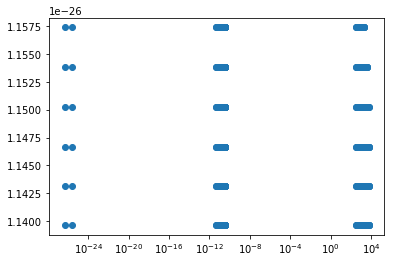

In [89]:
y_reduced = yy_dum.flatten()[yy_dum.flatten() != 0]
rho_reduced = rho_dum.flatten()[rho_dum.flatten() != 0]
plt.plot(y_reduced/AU, rho_reduced, 'o')
plt.xscale('log')

In [78]:
xx = x_reduced.flatten()[x_reduced.flatten() != 0]

In [91]:
rc.min()/AU

0.013947551460704047

In [79]:
xx.max()/AU

383.79093458548959

In [74]:
np.shape(x_reduced)

714

In [18]:
rr = np.array([1,2,3])
tt = np.array([0,1,2])
pp = np.array([0,1,2])
xx, yy, zz = np.meshgrid(rr,tt,pp, indexing='ij')

In [25]:
x = (xx**2*np.cos(tt)*np.sin(pp))

In [42]:
yy_dum.flatten()[yy_dum.flatten() != 0]

array([], dtype=float64)

In [44]:
rho_dum.flatten()[rho_dum.flatten() != 0]

array([], dtype=float64)